In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Load dataset
train = pd.read_csv('DATA.csv')

# Data overview
print("Dataset Head:")
display(train.head()) 

Dataset Head:


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive



Value Counts for Target Variable:


<Axes: xlabel='MonkeyPox'>

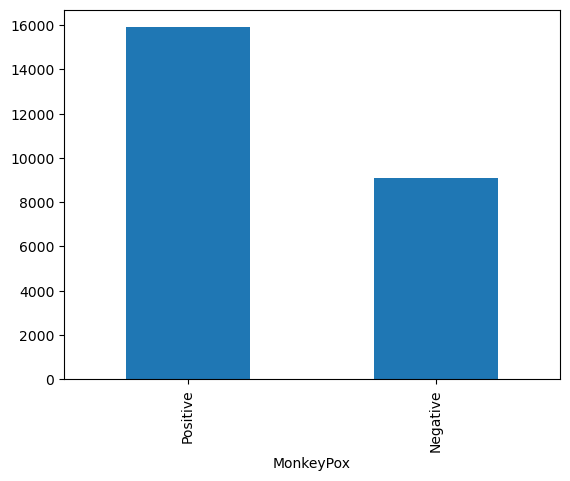

In [4]:
print("\nValue Counts for Target Variable:")
train['MonkeyPox'].value_counts().plot(kind='bar')

In [5]:
print("\nUnique values in 'Systemic Illness' column:")
print(train['Systemic Illness'].unique())


Unique values in 'Systemic Illness' column:
[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']


In [6]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,3,2,2,2,2,2,2,2,2,2
top,P24999,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [7]:
print("\nDataset Information:")
train.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [8]:
# Check for missing values
print("\nMissing Values in Each Column:")
display(train.isna().sum())


Missing Values in Each Column:


Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [9]:
# Drop 'Patient_ID' column as it's not relevant for modeling
train.drop(['Patient_ID'], axis=1, inplace=True)

In [10]:
# Binary mapping for categorical columns with True/False values
binary_map = {True: 1, False: 0}

In [11]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,3,2,2,2,2,2,2,2,2,2
top,Fever,False,True,True,False,True,True,True,False,Positive
freq,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [12]:
columns_to_map = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 
                  'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

for col in columns_to_map:
    train[col] = train[col].map(binary_map)

In [13]:
# Fill missing values in 'Systemic Illness' with 'tidak' (means 'None' or 'No Illness')
train['Systemic Illness'] = train['Systemic Illness'].fillna('n/a')

In [14]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
# One-hot encoding for 'Systemic Illness' column
encoded_data = pd.get_dummies(train['Systemic Illness'], prefix='Systemic Illness')
train = pd.concat([train, encoded_data], axis=1)

In [16]:
# Drop original 'Systemic Illness' column
train.drop('Systemic Illness', axis=1, inplace=True)

In [17]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [18]:
train

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_n/a
0,0,1,1,1,0,1,0,0,Negative,False,False,False,True
1,1,0,1,1,0,0,1,0,Positive,True,False,False,False
2,0,1,1,0,0,0,1,0,Positive,True,False,False,False
3,1,0,0,0,1,1,1,0,Positive,False,False,False,True
4,1,1,1,0,0,1,1,0,Positive,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,Positive,False,False,False,True
24996,0,1,1,0,1,1,1,1,Positive,True,False,False,False
24997,1,1,0,0,1,1,0,0,Positive,False,False,False,True
24998,0,1,0,1,1,1,0,0,Negative,False,False,True,False


In [19]:
# Map 'MonkeyPox' target variable to binary
monkey_map = {'Positive': 1, 'Negative': 0}
train['MonkeyPox'] = train['MonkeyPox'].map(monkey_map)

In [20]:
# Correlation heatmap for numeric features
numeric_df = train.select_dtypes(include=['number'])
corr = numeric_df.corr()


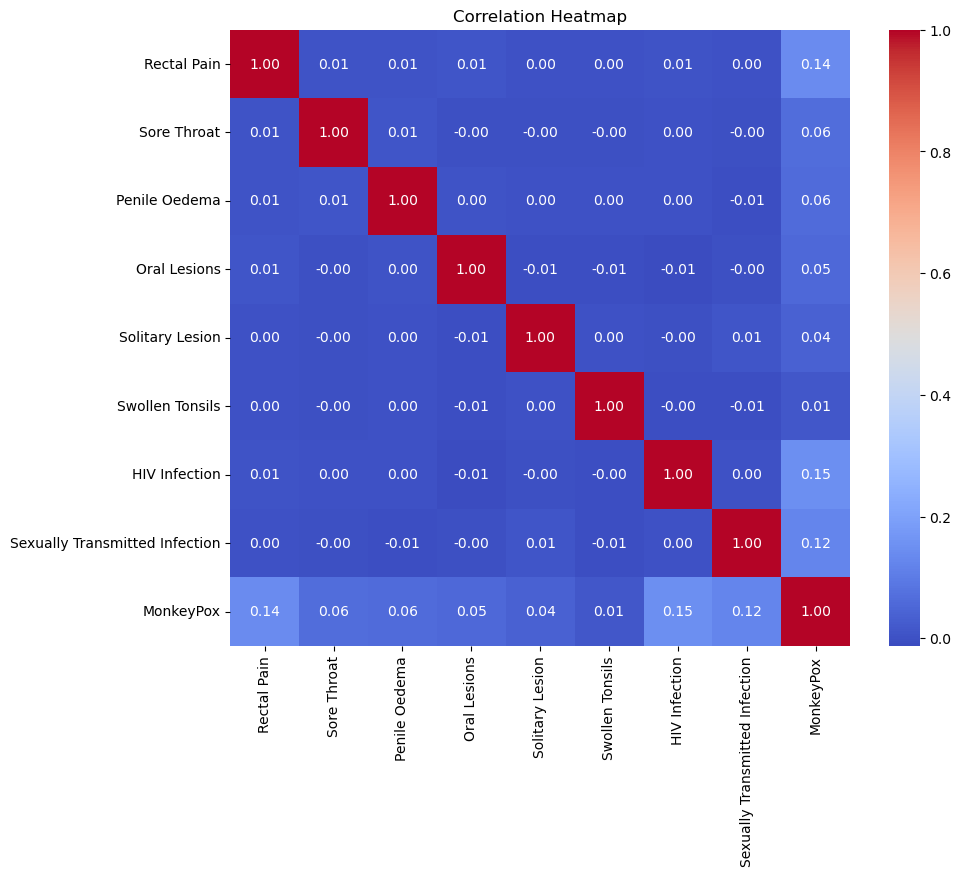

In [21]:
# Plot heatmap with correlation values formatted to 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

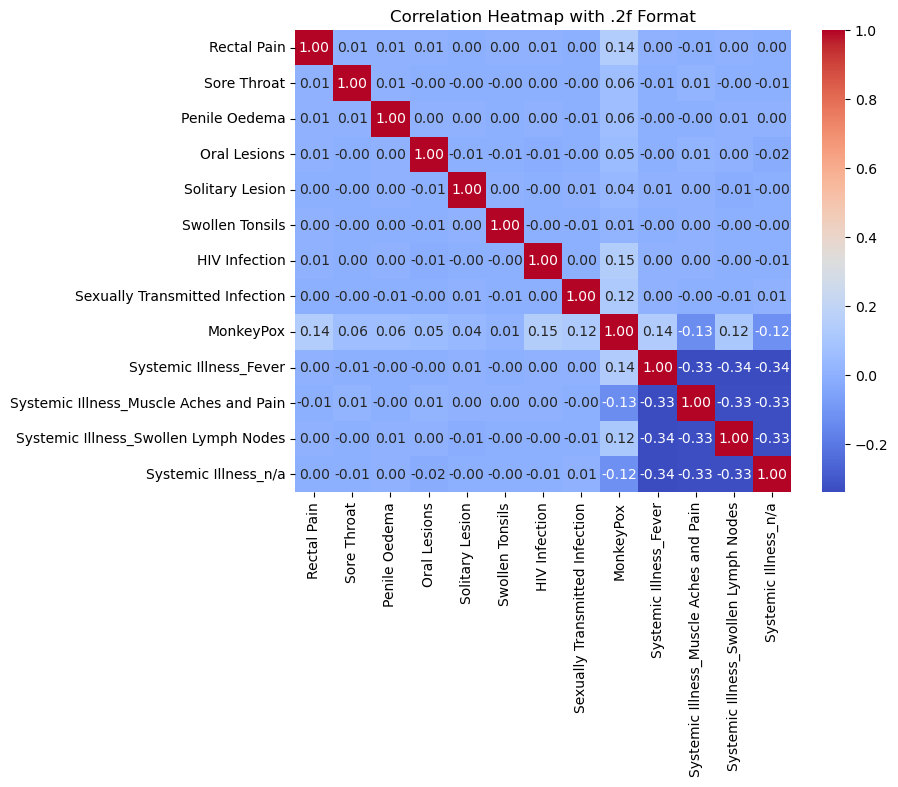

In [22]:
# Ensure all binary columns are numeric (they should be, but just in case)
train = train.astype({col: 'int64' for col in train.columns if 'Systemic Illness_' in col})

# Select only numeric columns again, ensuring that the newly encoded columns are included
numeric_df = train.select_dtypes(include=['number'])

# Generate the correlation matrix and plot the heatmap
corr = numeric_df.corr()

# Plot heatmap with correlation values formatted to 2 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with .2f Format')
plt.show()

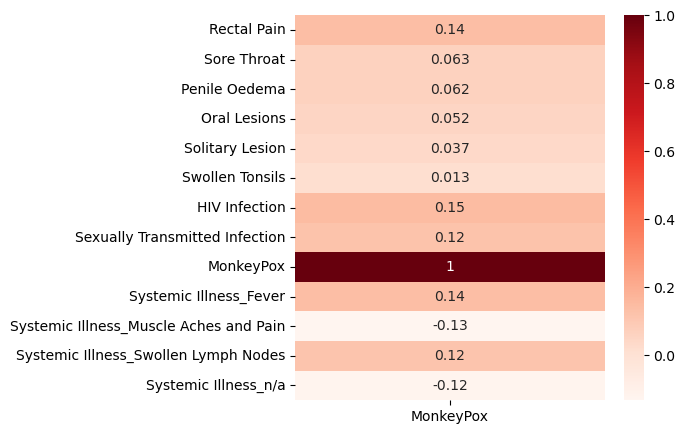

In [23]:
# Correlation with 'MonkeyPox'
target_correlation = train.corr()[['MonkeyPox']]
plt.figure(figsize=(5,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: xlabel='MonkeyPox'>

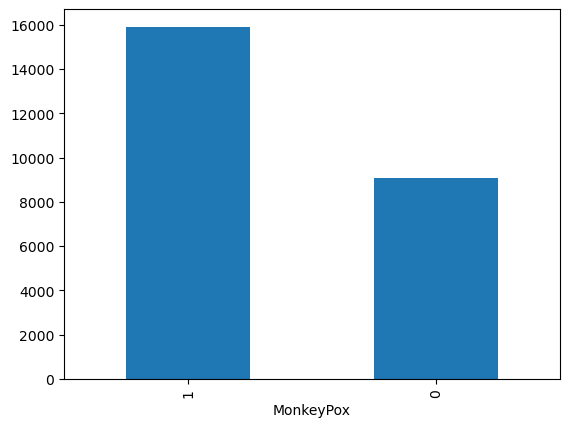

In [24]:
train['MonkeyPox'].value_counts().plot(kind='bar')

In [25]:
# Split data into features and target variable
X = train.drop(['MonkeyPox'], axis=1)
y = train['MonkeyPox']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Compute class weights to handle class imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

In [27]:
# Define hyperparameters for XGBoost (CPU)
paramsXGB = {
    'max_depth': 3,
    'learning_rate': 0.0157,
    'n_estimators': 100,
    'min_child_weight': 25,
    'gamma': 0.0001,
    'alpha': 7.148,
    'lambda': 0.137,
    'colsample_bytree': 0.796,
    'subsample': 0.638,
    'tree_method': 'hist',
    'booster': 'gbtree',
    'random_state': 228,
    'use_label_encoder': False,
    'scale_pos_weight': class_weights_dict[1],
    'verbosity': 0
}

# Define hyperparameters for CatBoost (CPU)
paramsCB = {
    'depth': 3,
    'learning_rate': 0.0175,
    'iterations': 100,
    'max_bin': 461,
    'min_data_in_leaf': 162,
    'l2_leaf_reg': 0.027,
    'subsample': 0.689,
    'grow_policy': 'Depthwise',
    'leaf_estimation_method': 'Gradient',
    'bootstrap_type': 'Bernoulli',
    'random_seed': 228,
    'loss_function': 'Logloss',
    'task_type': 'CPU',
    'class_weights': class_weights.tolist(),
    'verbose': 0
}

# Define hyperparameters for LightGBM (CPU)
paramsLGBM = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.0165,
    'reg_alpha': 7.555,
    'reg_lambda': 0.953,
    'num_leaves': 155,
    'min_data_per_group': 177,
    'min_child_samples': 150,
    'colsample_bytree': 0.227,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'random_state': 228,
    'device_type': 'cpu',
    'class_weight': class_weights_dict,
    'verbose': -1
}

In [28]:
# Define the base estimators
base_estimators = [
    ('lgb', LGBMClassifier(**paramsLGBM)),
    ('xgb', XGBClassifier(**paramsXGB)),
    ('cb', CatBoostClassifier(**paramsCB)),
    ('log', LogisticRegression(max_iter=200, solver='liblinear', verbose=0)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=228)),  # Random Forest
    ('svc', SVC(probability=True, kernel='linear'))  # Support Vector Classifier
]

# Define the intermediate layer of stacking with 3 models
intermediate_layer = StackingClassifier(
    estimators=[
        ('lgb', LGBMClassifier(verbose=-1)),
        ('cat', CatBoostClassifier(verbose=0)),
        ('xgb', XGBClassifier(**paramsXGB))  # Add one more model if needed
    ],
    final_estimator=LogisticRegression(max_iter=200, solver='liblinear', verbose=0)
)

# Define the final stacking model with 6 base models
final_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=intermediate_layer,
    cv=3,
    verbose=0
)


In [29]:
# Fit the model
final_model.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('lgb',
                                LGBMClassifier(class_weight={0: 1.362954886193267,
                                                             1: 0.7897022822395957},
                                               colsample_bytree=0.227,
                                               device_type='cpu',
                                               learning_rate=0.0165,
                                               max_depth=3,
                                               min_child_samples=150,
                                               min_data_per_group=177,
                                               num_leaves=155,
                                               objective='binary',
                                               random_state=228,
                                               reg_alpha=7.555,
                                               reg_lambda=0.953, verbose=-1)),
                               ('xgb',
                                XGBClassifier...
                                                                                 interaction_constraints=None,
                                                                                 lambda=0.137,
                                                                                 learning_rate=0.0157,
                                                                                 max_bin=None,
                                                                                 max_cat_threshold=None,
                                                                                 max_cat_to_onehot=None,
                                                                                 max_delta_step=None,
                                                                                 max_depth=3,
                                                                                 max_leaves=None,
                                                                                 min_child_weight=25,
                                                                                 missing=nan,
                                                                                 monotone_constraints=None,
                                                                                 multi_strategy=None,
                                                                                 n_estimators=100,
                                                                                 n_jobs=None, ...))],
                                                      final_estimator=LogisticRegression(max_iter=200,
                                                                                         solver='liblinear')))

Training Accuracy: 69.19%
Test Accuracy: 70.28%


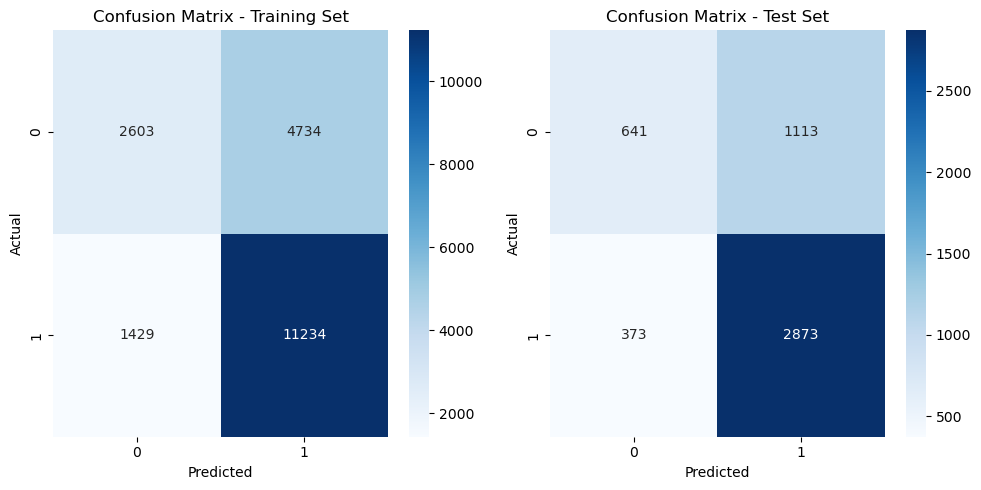

In [31]:
# Predict on train and test sets
train_preds = final_model.predict(X_train)
test_preds = final_model.predict(X_test)


# Calculate confusion matrix and accuracy
train_cm = confusion_matrix(y_train, train_preds)
test_cm = confusion_matrix(y_test, test_preds)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Display accuracy results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot confusion matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Generate a classification report
train_report = classification_report(y_train, train_preds, output_dict=True)
test_report = classification_report(y_test, test_preds, output_dict=True)

# Print the report to get an idea of the metrics
print("Training Metrics:\n", classification_report(y_train, train_preds))
print("Test Metrics:\n", classification_report(y_test, test_preds))


Training Metrics:
               precision    recall  f1-score   support

           0       0.65      0.35      0.46      7337
           1       0.70      0.89      0.78     12663

    accuracy                           0.69     20000
   macro avg       0.67      0.62      0.62     20000
weighted avg       0.68      0.69      0.66     20000

Test Metrics:
               precision    recall  f1-score   support

           0       0.63      0.37      0.46      1754
           1       0.72      0.89      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.63      0.63      5000
weighted avg       0.69      0.70      0.68      5000



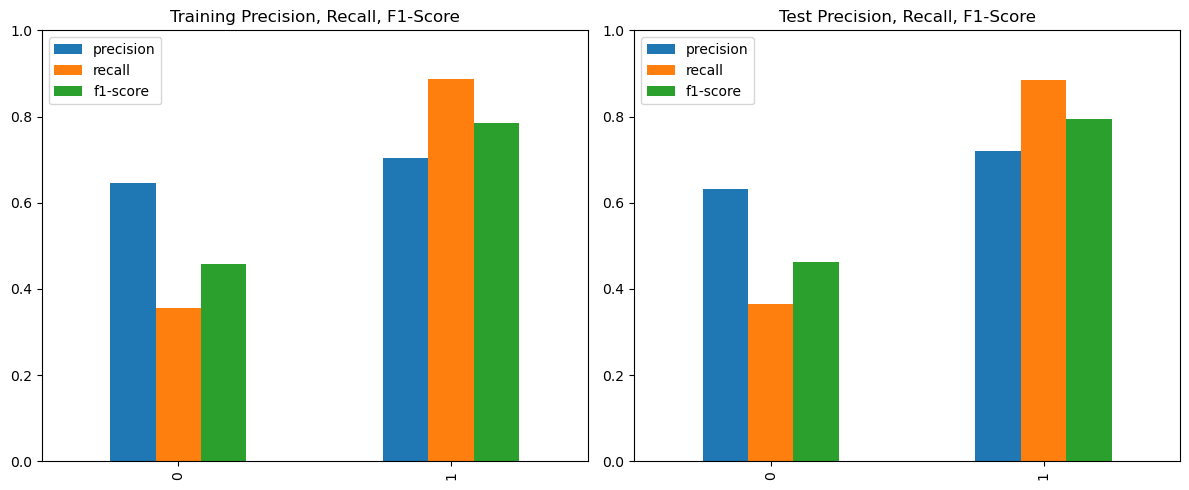

In [34]:
# Convert classification report dictionary to DataFrame for better plotting
train_metrics_df = pd.DataFrame(train_report).transpose()
test_metrics_df = pd.DataFrame(test_report).transpose()

# Plot precision, recall, and F1-score for both training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for training set
train_metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Precision, Recall, F1-Score')
axes[0].set_ylim([0, 1])

# Plot for test set
test_metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', ax=axes[1])
axes[1].set_title('Test Precision, Recall, F1-Score')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


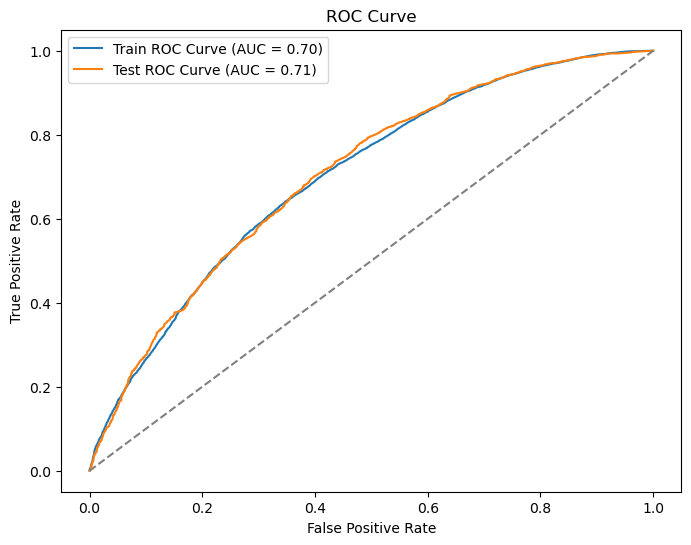

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for training set
train_fpr, train_tpr, _ = roc_curve(y_train, final_model.predict_proba(X_train)[:, 1])
train_auc = roc_auc_score(y_train, final_model.predict_proba(X_train)[:, 1])

# Calculate ROC curve and AUC for test set
test_fpr, test_tpr, _ = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])
test_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Example user input based on the training data columns
user_input = {
    'Rectal Pain': 0,                      # Example input for rectal pain (0 or 1)
    'Sore Throat': 1,                      # Example input for sore throat
    'Penile Oedema': 1,                    # Example input for penile edema
    'Oral Lesions': 0,                     # Example input for oral lesions
    'Solitary Lesion': 1,                  # Example input for solitary lesion
    'Swollen Tonsils': 0,                  # Example input for swollen tonsils
    'HIV Infection': 0,                     # Example input for HIV infection
    'Sexually Transmitted Infection': 0,    # Example input for sexually transmitted infection
    'Systemic Illness_Fever': 1,           # Example input for fever
    'Systemic Illness_Muscle Aches and Pain': 1,  # Example input for muscle aches
    'Systemic Illness_Swollen Lymph Nodes': 1,  # Example input for swollen lymph nodes
    'Systemic Illness_n/a': 0               # Example input for 'not applicable'
}

# Convert user input to DataFrame for prediction
import pandas as pd

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input])

# Make sure to apply any necessary preprocessing that was used on the training data
# For example, if you encoded categorical variables or scaled numerical ones, apply the same transformation here

# Predict using the trained model
prediction = final_model.predict(user_input_df)

# Interpret the prediction
if prediction[0] == 1:  # Assuming '1' indicates positive monkeypox
    print("The patient is predicted to be positive for monkeypox.")
else:
    print("The patient is predicted to be negative for monkeypox.")


The patient is predicted to be positive for monkeypox.


In [56]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'monkeypox_model.pkl')

['monkeypox_model.pkl']

# Interface for INPUT Data

In [52]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Assuming 'model' is your trained model

# Create widgets for each input
rectal_pain = widgets.Dropdown(options=[0, 1], description='Rectal Pain:')
sore_throat = widgets.Dropdown(options=[0, 1], description='Sore Throat:')
penile_oedema = widgets.Dropdown(options=[0, 1], description='Penile Oedema:')
oral_lesions = widgets.Dropdown(options=[0, 1], description='Oral Lesions:')
solitary_lesion = widgets.Dropdown(options=[0, 1], description='Solitary Lesion:')
swollen_tonsils = widgets.Dropdown(options=[0, 1], description='Swollen Tonsils:')
hiv_infection = widgets.Dropdown(options=[0, 1], description='HIV Infection:')
sti = widgets.Dropdown(options=[0, 1], description='Sexually Transmitted Infection:')
fever = widgets.Dropdown(options=[0, 1], description='Systemic Illness_Fever:')
muscle_aches = widgets.Dropdown(options=[0, 1], description='Systemic Illness_Muscle Aches:')
swollen_lymph_nodes = widgets.Dropdown(options=[0, 1], description='Systemic Illness_Swollen Lymph Nodes:')
systemic_illness_na = widgets.Dropdown(options=[0, 1], description='Systemic Illness_n/a:')

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict Monkeypox Status')

# Output area for prediction results
output = widgets.Output()

def on_predict_button_clicked(b):
    # Gather inputs
    user_input = {
        'Rectal Pain': rectal_pain.value,
        'Sore Throat': sore_throat.value,
        'Penile Oedema': penile_oedema.value,
        'Oral Lesions': oral_lesions.value,
        'Solitary Lesion': solitary_lesion.value,
        'Swollen Tonsils': swollen_tonsils.value,
        'HIV Infection': hiv_infection.value,
        'Sexually Transmitted Infection': sti.value,
        'Systemic Illness_Fever': fever.value,
        'Systemic Illness_Muscle Aches and Pain': muscle_aches.value,
        'Systemic Illness_Swollen Lymph Nodes': swollen_lymph_nodes.value,
        'Systemic Illness_n/a': systemic_illness_na.value
    }

    # Create DataFrame for prediction
    user_input_df = pd.DataFrame([user_input])

    # Predict using the trained model
    prediction = final_model.predict(user_input_df)

    # Output the result
    with output:
        output.clear_output()  # Clear previous output
        if prediction[0] == 1:  # Assuming '1' indicates positive monkeypox
            print("The patient is predicted to be positive for monkeypox.")
        else:
            print("The patient is predicted to be negative for monkeypox.")

# Link the button click event to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display all widgets and the output area
display(rectal_pain, sore_throat, penile_oedema, oral_lesions, solitary_lesion, swollen_tonsils,
        hiv_infection, sti, fever, muscle_aches, swollen_lymph_nodes, systemic_illness_na,
        predict_button, output)


Dropdown(description='Rectal Pain:', options=(0, 1), value=0)

Dropdown(description='Sore Throat:', options=(0, 1), value=0)

Dropdown(description='Penile Oedema:', options=(0, 1), value=0)

Dropdown(description='Oral Lesions:', options=(0, 1), value=0)

Dropdown(description='Solitary Lesion:', options=(0, 1), value=0)

Dropdown(description='Swollen Tonsils:', options=(0, 1), value=0)

Dropdown(description='HIV Infection:', options=(0, 1), value=0)

Dropdown(description='Sexually Transmitted Infection:', options=(0, 1), value=0)

Dropdown(description='Systemic Illness_Fever:', options=(0, 1), value=0)

Dropdown(description='Systemic Illness_Muscle Aches:', options=(0, 1), value=0)

Dropdown(description='Systemic Illness_Swollen Lymph Nodes:', options=(0, 1), value=0)

Dropdown(description='Systemic Illness_n/a:', options=(0, 1), value=0)

Button(description='Predict Monkeypox Status', style=ButtonStyle())

Output()

In [49]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [50]:
# For JupyterLab
!pip install jupyterlab
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-24.8.0-py3-none-any.whl.metadata (2.6 kB)
Using cached webcolors-24.8.0-py3-none-any.whl (15 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/home/salman/anaconda3/lib/python3.12/site-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/home/salman/anaconda3/lib/pyth

In [51]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [53]:
!pip show ipywidgets


Name: ipywidgets
Version: 7.8.1
Summary: IPython HTML widgets for Jupyter
Home-page: http://ipython.org
Author: IPython Development Team
Author-email: ipython-dev@scipy.org
License: BSD
Location: /home/salman/anaconda3/lib/python3.12/site-packages
Requires: comm, ipython, ipython-genutils, jupyterlab-widgets, traitlets, widgetsnbextension
Required-by: jupyter


In [54]:
import ipywidgets as widgets
from IPython.display import display

# Create a simple button
test_button = widgets.Button(description="Click Me")

def on_button_click(b):
    print("Button clicked!")

test_button.on_click(on_button_click)
display(test_button)


Button(description='Click Me', style=ButtonStyle())

In [58]:
import pandas as pd

def predict_monkeypox(user_input):
    # Convert the user input into a DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Ensure the input columns match the training data columns
    input_df = input_df.reindex(columns=model.feature_names_in_, fill_value=0)
    
    # Make a prediction
    prediction = model.predict(input_df)
    
    return prediction[0]  # Return the prediction result


user_input = {
    'Rectal Pain': 0,
    'Sore Throat': 1,
    'Penile Oedema': 1,
    'Oral Lesions': 1,
    'Solitary Lesion': 0,
    'Swollen Tonsils': 1,
    'HIV Infection': 0,
    'Sexually Transmitted Infection': 0,
    'Systemic Illness_Fever': False,
    'Systemic Illness_Muscle Aches and Pain': False,
    'Systemic Illness_Swollen Lymph Nodes': False,
    'Systemic Illness_n/a': True,
}

# Load the model
model = joblib.load('monkeypox_model.pkl')

# Predict
result = predict_monkeypox(user_input)

if result == 'Positive':
    print("The patient is likely to have Monkeypox.")
else:
    print("The patient is likely to be Negative for Monkeypox.")



The patient is likely to be Negative for Monkeypox.


In [59]:
import joblib
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the model
model = joblib.load('monkeypox_model.pkl')

# Create widgets for user input
rectal_pain = widgets.IntSlider(value=0, min=0, max=1, description='Rectal Pain:')
sore_throat = widgets.IntSlider(value=0, min=0, max=1, description='Sore Throat:')
penile_oedema = widgets.IntSlider(value=0, min=0, max=1, description='Penile Oedema:')
oral_lesions = widgets.IntSlider(value=0, min=0, max=1, description='Oral Lesions:')
solitary_lesion = widgets.IntSlider(value=0, min=0, max=1, description='Solitary Lesion:')
swollen_tonsils = widgets.IntSlider(value=0, min=0, max=1, description='Swollen Tonsils:')
hiv_infection = widgets.IntSlider(value=0, min=0, max=1, description='HIV Infection:')
sti = widgets.IntSlider(value=0, min=0, max=1, description='Sexually Transmitted Infection:')
systemic_fever = widgets.Checkbox(value=False, description='Systemic Illness - Fever')
muscle_aches = widgets.Checkbox(value=False, description='Systemic Illness - Muscle Aches')
swollen_lymph_nodes = widgets.Checkbox(value=False, description='Systemic Illness - Swollen Lymph Nodes')
systemic_na = widgets.Checkbox(value=False, description='Systemic Illness - n/a')

# Create a button to make a prediction
predict_button = widgets.Button(description="Predict")

# Function to make predictions based on user input
def predict_monkeypox(user_input):
    input_df = pd.DataFrame([user_input])
    input_df = input_df.reindex(columns=model.feature_names_in_, fill_value=0)
    prediction = model.predict(input_df)
    return prediction[0]

# Function to handle button click event
def on_predict_button_clicked(b):
    user_input = {
        'Rectal Pain': rectal_pain.value,
        'Sore Throat': sore_throat.value,
        'Penile Oedema': penile_oedema.value,
        'Oral Lesions': oral_lesions.value,
        'Solitary Lesion': solitary_lesion.value,
        'Swollen Tonsils': swollen_tonsils.value,
        'HIV Infection': hiv_infection.value,
        'Sexually Transmitted Infection': sti.value,
        'Systemic Illness_Fever': systemic_fever.value,
        'Systemic Illness_Muscle Aches and Pain': muscle_aches.value,
        'Systemic Illness_Swollen Lymph Nodes': swollen_lymph_nodes.value,
        'Systemic Illness_n/a': systemic_na.value,
    }
    result = predict_monkeypox(user_input)
    print(f"Prediction Result: {'Positive' if result == 'Positive' else 'Negative'}")

# Attach the event to the button
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(rectal_pain, sore_throat, penile_oedema, oral_lesions, solitary_lesion, swollen_tonsils, hiv_infection, sti, systemic_fever, muscle_aches, swollen_lymph_nodes, systemic_na, predict_button)


IntSlider(value=0, description='Rectal Pain:', max=1)

IntSlider(value=0, description='Sore Throat:', max=1)

IntSlider(value=0, description='Penile Oedema:', max=1)

IntSlider(value=0, description='Oral Lesions:', max=1)

IntSlider(value=0, description='Solitary Lesion:', max=1)

IntSlider(value=0, description='Swollen Tonsils:', max=1)

IntSlider(value=0, description='HIV Infection:', max=1)

IntSlider(value=0, description='Sexually Transmitted Infection:', max=1)

Checkbox(value=False, description='Systemic Illness - Fever')

Checkbox(value=False, description='Systemic Illness - Muscle Aches')

Checkbox(value=False, description='Systemic Illness - Swollen Lymph Nodes')

Checkbox(value=False, description='Systemic Illness - n/a')

Button(description='Predict', style=ButtonStyle())